# REDES NEURAIS ARTIFICIAIS
## Evaluate Improve e Tunning

# Parte 1 - Pré-processamento dos Dados

### Importar as libs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

### Importar o dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [5]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
np.shape(X_train)

(8000, 12)

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='selu'))

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='selu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='softplus'))

## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [14]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 783us/step - loss: 1.6939 - accuracy: 0.4560
Epoch 2/100
250/250 [==============================] - 0s 815us/step - loss: 0.6755 - accuracy: 0.6209
Epoch 3/100
250/250 [==============================] - 0s 831us/step - loss: 0.5865 - accuracy: 0.7426
Epoch 4/100
250/250 [==============================] - 0s 783us/step - loss: 0.5316 - accuracy: 0.7885
Epoch 5/100
250/250 [==============================] - 0s 779us/step - loss: 0.4958 - accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 795us/step - loss: 0.4728 - accuracy: 0.8021
Epoch 7/100
250/250 [==============================] - 0s 767us/step - loss: 0.4591 - accuracy: 0.8020
Epoch 8/100
250/250 [==============================] - 0s 791us/step - loss: 0.4503 - accuracy: 0.8041
Epoch 9/100
250/250 [==============================] - 0s 771us/step - loss: 0.4436 - accuracy: 0.8056
Epoch 10/100
250/250 [==============================] - 0s 847us/step - l

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [15]:
y_pred = ann.predict(X_test)
y_pred

array([[0.3118914 ],
       [0.3386067 ],
       [0.1713271 ],
       ...,
       [0.15556657],
       [0.16811639],
       [0.24023703]], dtype=float32)

In [16]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Criando uma Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1531   64]
 [ 213  192]]


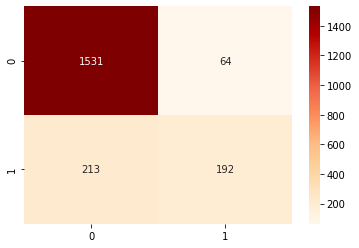

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

---
# Avaliando o Modelo

In [20]:
# Evaluating the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softplus'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [22]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [23]:
print(mean,variance)

0.818875002861023 0.009411592480813502


# Melhorando o modelo

In [24]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
from tensorflow.keras.layers import Dropout

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softplus'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [25]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [26]:
print(mean,variance)

0.81700000166893 0.00929045557818402


# Tuning the ANN

In [26]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {
    'batch_size': [10, 25, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator = classifier,
                           scoring = 'accuracy',
                           param_grid = parameters,
                           cv = 10)

In [27]:
%%time

grid_search = grid_search.fit(X_train, y_train)

Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.7953
Epoch 2/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4403 - accuracy: 0.7943
Epoch 3/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8022: 0s - loss: 0.4302 - accura
Epoch 4/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.7987
Epoch 5/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7903
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.7913
Epoch 7/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4407 - accuracy: 0.7973
Epoch 8/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4282 - accuracy: 0.8113
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8296
Epoch 10/50
720/720 [==============================] - 1s 2ms/step - los

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 3s 3ms/step - loss: 0.5776 - accuracy: 0.7859
Epoch 2/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4461 - accuracy: 0.7947
Epoch 3/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4326 - accuracy: 0.8016
Epoch 4/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4275 - accuracy: 0.7929
Epoch 5/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4241 - accuracy: 0.7992
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8096
Epoch 7/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8016
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.8087
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4255 - accuracy: 0.8216
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.8236

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5809 - accuracy: 0.7877
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4419 - accuracy: 0.7966
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4287 - accuracy: 0.7976
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4514 - accuracy: 0.7860
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.7909
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8000
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.7931
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8225
Epoch 9/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8261
Epoch 10/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4252 - accuracy: 0.8284: 0s - loss

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5734 - accuracy: 0.7946
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4460 - accuracy: 0.7925
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.7928
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4243 - accuracy: 0.7971
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4295 - accuracy: 0.7927
Epoch 6/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4233 - accuracy: 0.7980
Epoch 7/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.8105
Epoch 8/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.8198
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.8254
Epoch 10/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8220
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5765 - accuracy: 0.7814
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4313 - accuracy: 0.7949
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4208 - accuracy: 0.8021
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy: 0.7981
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8146
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8280
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8196
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8216
Epoch 9/50
720/720 [==============================] - 1s 975us/step - loss: 0.4182 - accuracy: 0.8167
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4168 - accuracy: 0.8142
Epoch 11

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.5751 - accuracy: 0.7860
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4370 - accuracy: 0.8047
Epoch 3/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8148
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4199 - accuracy: 0.8124
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4086 - accuracy: 0.8203
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4032 - accuracy: 0.8233
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4031 - accuracy: 0.8271
Epoch 8/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8196
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8218
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4072 - accuracy: 0.8188

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.5737 - accuracy: 0.7943
Epoch 2/50
720/720 [==============================] - 1s 949us/step - loss: 0.4309 - accuracy: 0.8054
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8037
Epoch 4/50
720/720 [==============================] - 1s 987us/step - loss: 0.4419 - accuracy: 0.7934
Epoch 5/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.7938
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4264 - accuracy: 0.7986
Epoch 7/50
720/720 [==============================] - 1s 996us/step - loss: 0.4180 - accuracy: 0.8021
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8179
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.8236: 0s - los
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4268 - 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 969us/step - loss: 0.5902 - accuracy: 0.7895
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4405 - accuracy: 0.7975
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4218 - accuracy: 0.8050
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.7980
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8097
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3870 - accuracy: 0.8317
Epoch 7/50
720/720 [==============================] - 1s 951us/step - loss: 0.3952 - accuracy: 0.8407
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3859 - accuracy: 0.8407
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3855 - accuracy: 0.8466
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3709 - accuracy: 0.8451
Epoch 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 992us/step - loss: 0.5721 - accuracy: 0.7995
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4418 - accuracy: 0.7952
Epoch 3/50
720/720 [==============================] - 1s 996us/step - loss: 0.4368 - accuracy: 0.79790s - loss: 0.4347 - ac
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.7973
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4388 - accuracy: 0.7853
Epoch 6/50
720/720 [==============================] - 1s 1000us/step - loss: 0.4185 - accuracy: 0.7993
Epoch 7/50
720/720 [==============================] - 1s 962us/step - loss: 0.4272 - accuracy: 0.7976
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.7994
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8293
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.422

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5719 - accuracy: 0.7984
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4289 - accuracy: 0.8028
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.7991
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4294 - accuracy: 0.7948
Epoch 5/50
720/720 [==============================] - 1s 968us/step - loss: 0.4239 - accuracy: 0.79430s - loss: 0.4233 - accuracy: 0.
Epoch 6/50
720/720 [==============================] - 1s 934us/step - loss: 0.4395 - accuracy: 0.7864
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4242 - accuracy: 0.8086
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.8232
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4150 - accuracy: 0.8306
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 2s 1ms/step - loss: 0.5737 - accuracy: 0.7969: 0s - loss: 0.6
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4363 - accuracy: 0.7958
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4432 - accuracy: 0.7902
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4307 - accuracy: 0.7974
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.7949
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.7982
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4302 - accuracy: 0.8176: 0s - loss: 0.4308 - ac
Epoch 8/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4237 - accuracy: 0.8260
Epoch 9/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.8195: 1s - loss:
Epoch 10/50
720/720 [==============================] - 1s 2

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.5795 - accuracy: 0.7921
Epoch 2/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.7921
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.7956
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.7984
Epoch 5/50
720/720 [==============================] - 2s 2ms/step - loss: 0.4353 - accuracy: 0.7975
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4261 - accuracy: 0.7962
Epoch 7/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.8040
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4285 - accuracy: 0.8245
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.8280
Epoch 10/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4359 - accuracy: 0.8261

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7969
Epoch 2/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8002
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.7902
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.7947
Epoch 5/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4473 - accuracy: 0.7880
Epoch 6/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4334 - accuracy: 0.7914
Epoch 7/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4341 - accuracy: 0.7917
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4264 - accuracy: 0.7986
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4067 - accuracy: 0.8141
Epoch 10/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8198

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.5914 - accuracy: 0.7944
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4512 - accuracy: 0.7920
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8007
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4299 - accuracy: 0.8017
Epoch 5/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.7989
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4311 - accuracy: 0.7972
Epoch 7/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.8003
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4241 - accuracy: 0.7990
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8175
Epoch 10/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8278

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.5818 - accuracy: 0.7877
Epoch 2/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.7993: 1s -
Epoch 3/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.7938
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4242 - accuracy: 0.8023
Epoch 5/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.7964
Epoch 6/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8048
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4300 - accuracy: 0.8172
Epoch 8/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8177: 0s - loss: 0.4
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8206
Epoch 10/50
720/720 [==============================] - 2s 3ms/step - loss: 0.4

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.5899 - accuracy: 0.7903: 0s - loss: 0.6117 - ac
Epoch 2/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4379 - accuracy: 0.7961
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4277 - accuracy: 0.7978
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4103 - accuracy: 0.8047
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4230 - accuracy: 0.7926
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.7986
Epoch 7/50
720/720 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8452
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3969 - accuracy: 0.8430
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3960 - accuracy: 0.8431
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.6490 - accuracy: 0.7908
Epoch 2/50
720/720 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7961
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4844 - accuracy: 0.8012
Epoch 4/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 0.8152
Epoch 5/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8190
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.8205: 0s - loss: 0.4385 - accuracy: 0. - ETA: 0s - loss: 0.4390 - accuracy
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8207
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4454 - accuracy: 0.8166
Epoch 9/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8350
Epoch 10/50
720/720 [=========

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 1ms/step - loss: 0.5846 - accuracy: 0.7958
Epoch 2/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.7928
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4445 - accuracy: 0.7947
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.7966: 0s - loss:
Epoch 5/50
720/720 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.7956
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.8065
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8232
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4259 - accuracy: 0.8259
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8325: 0s - loss: 0.4200 - accuracy
Epoch 10/50
720/720 [==============================] - 1s 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 2s 2ms/step - loss: 0.5803 - accuracy: 0.7993
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.8012
Epoch 3/50
720/720 [==============================] - 1s 991us/step - loss: 0.4447 - accuracy: 0.7924
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4431 - accuracy: 0.7919
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4309 - accuracy: 0.7950
Epoch 6/50
720/720 [==============================] - 1s 989us/step - loss: 0.4466 - accuracy: 0.7941
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.7928
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4213 - accuracy: 0.8209: 0s - loss: 0.4206 - accuracy: 0.
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.8310
Epoch 10/50
720/720 [==============================] - 1s 1ms/

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 1s 998us/step - loss: 0.5863 - accuracy: 0.8030
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8016
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4312 - accuracy: 0.8040
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.8021
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4198 - accuracy: 0.7992
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8001
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4239 - accuracy: 0.8048
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.8210
Epoch 9/50
720/720 [==============================] - 1s 984us/step - loss: 0.4258 - accuracy: 0.8269
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5864 - accuracy: 0.7959
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4344 - accuracy: 0.8013
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4328 - accuracy: 0.8134
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8266
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8158
Epoch 6/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4148 - accuracy: 0.8196
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4119 - accuracy: 0.8172
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8240
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4085 - accuracy: 0.8190
Epoch 10/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8230
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.5715 - accuracy: 0.7953
Epoch 2/100
720/720 [==============================] - 1s 963us/step - loss: 0.4330 - accuracy: 0.7974
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7907
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.7927
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8045
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.7932
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8123
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.8232
Epoch 9/100
720/720 [==============================] - 3s 3ms/step - loss: 0.4278 - accuracy: 0.8198
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4243 - accu

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.5722 - accuracy: 0.7901
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.8017
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.8008
Epoch 4/100
720/720 [==============================] - 1s 928us/step - loss: 0.4308 - accuracy: 0.7963
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4164 - accuracy: 0.8061
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4271 - accuracy: 0.7962
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8002: 0s - loss: 0.4197 - accura
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.7966
Epoch 9/100
720/720 [==============================] - 1s 998us/step - loss: 0.4251 - accuracy: 0.8080
Epoch 10/100
720/720 [==============================] - 1s 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 963us/step - loss: 0.5707 - accuracy: 0.7965
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4424 - accuracy: 0.7944
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.7989
Epoch 4/100
720/720 [==============================] - 1s 962us/step - loss: 0.4293 - accuracy: 0.7975
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4356 - accuracy: 0.7908
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4377 - accuracy: 0.7945
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4151 - accuracy: 0.8106
Epoch 8/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4154 - accuracy: 0.8262
Epoch 9/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4334 - accuracy: 0.8238
Epoch 10/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4247 - accuracy: 0.82

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.5640 - accuracy: 0.7996
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.7919: 0s -
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.7959
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.7864: 0s - loss: 0 - ETA: 0s - loss: 0.4502 - ac
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.7956
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4330 - accuracy: 0.7925: 0s - l
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.8199
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8229
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8220
Epoch 10/100
720/720 [===========

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.7905
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.7995
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4307 - accuracy: 0.7925
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4373 - accuracy: 0.7953
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.7906
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.7997
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4382 - accuracy: 0.8123: 0s - loss: 0.4561 - accuracy: 0. - ETA: 0s - loss: 0.4483 
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.8254
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8290
Epoch 10/100
720/720 [=========

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.8027
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4463 - accuracy: 0.7970
Epoch 3/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4334 - accuracy: 0.7956
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4346 - accuracy: 0.7981
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4316 - accuracy: 0.8000
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4253 - accuracy: 0.8013: 0s - l
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4328 - accuracy: 0.7971
Epoch 8/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4349 - accuracy: 0.8134
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4182 - accuracy: 0.8217
Epoch 10/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4279 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 1s 949us/step - loss: 0.5735 - accuracy: 0.7881
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.7967
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4341 - accuracy: 0.7949
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.7989
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.8014
Epoch 6/100
720/720 [==============================] - 1s 962us/step - loss: 0.4235 - accuracy: 0.8077
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4252 - accuracy: 0.8234
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4372 - accuracy: 0.8198
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8287
Epoch 10/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4270 - ac

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 3s 1ms/step - loss: 0.5668 - accuracy: 0.7949
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.7972: 0s - loss: 0.4306 - accura
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4199 - accuracy: 0.7974
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4214 - accuracy: 0.7994
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4261 - accuracy: 0.8036
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4249 - accuracy: 0.8233
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4137 - accuracy: 0.8313
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4128 - accuracy: 0.8343
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4211 - accuracy: 0.8285
Epoch 10/100
720/720 [==============================] - 1s 1ms/

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 4s 4ms/step - loss: 0.5744 - accuracy: 0.7918
Epoch 2/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4435 - accuracy: 0.7925
Epoch 3/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4377 - accuracy: 0.7951
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8029: 
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.7951
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.7981: 1s - loss: 0.419 - ETA: 0s - loss: 0.423
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.7927
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4259 - accuracy: 0.7978
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4216 - accuracy: 0.8213: 1s - loss: 0
Epoch 10/100
720/720 [===========

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.5898 - accuracy: 0.7957: 0s - loss: 0
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.7918
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.7944
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8049
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4274 - accuracy: 0.8041
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8206
Epoch 7/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.8208
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8230
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4274 - accuracy: 0.8255
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.6054 - accuracy: 0.8044
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8041
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.7968
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8011
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4358 - accuracy: 0.7967
Epoch 6/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4413 - accuracy: 0.7900: 0s - loss: 0.4421 - accuracy
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4402 - accuracy: 0.7980
Epoch 8/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4334 - accuracy: 0.7933: 1s
Epoch 9/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4305 - accuracy: 0.7973
Epoch 10/100
720/720 [==============================] - 2

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.5868 - accuracy: 0.8057
Epoch 2/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4290 - accuracy: 0.8046
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8019
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.7990: 1s - los
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4359 - accuracy: 0.7917
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4285 - accuracy: 0.7957
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.8037: 0s - loss: 0.4238 - ac
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4258 - accuracy: 0.8254: 0s - loss: 0.4225 - 
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8176
Epoch 10/100
720/720 [=============

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 3s 3ms/step - loss: 0.5820 - accuracy: 0.7937
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8031
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.7867
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.7984
Epoch 5/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4295 - accuracy: 0.7997
Epoch 6/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4346 - accuracy: 0.7993
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8200
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8313: 0s - loss: 0.4206 - accuracy: 0. - ETA: 0s - loss: 0.4208 - accuracy: 0.83
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4313 - accuracy: 0.8191
Epoch 10/100
72

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.6080 - accuracy: 0.7854: 0s - loss: 0.6195 - accuracy: 
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.7916: 0s - loss: 0.4513 - 
Epoch 3/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.8017
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4292 - accuracy: 0.8192
Epoch 5/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4300 - accuracy: 0.8244
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4360 - accuracy: 0.8171
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4302 - accuracy: 0.8223
Epoch 8/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4356 - accuracy: 0.8171
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8178
Epoch 10/100
720/720 [===============

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.5944 - accuracy: 0.7973
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.8000: 0s - loss: 0.4312 - 
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.7915: 0s - loss: 0.4462 - ac
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4215 - accuracy: 0.8064: 0s - loss: 0.415
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.7932
Epoch 6/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4265 - accuracy: 0.7970
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.7992
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.7971
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8022
Epoch 10/100
720/720 [=====

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.5818 - accuracy: 0.7894
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7886
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.7904
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.7913
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.7997
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.7897
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8061
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4261 - accuracy: 0.8182: 0s - loss: 0.4261 - accuracy: 0.
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.8147
Epoch 10/100
720/720 [==============================] - 1

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 4s 2ms/step - loss: 0.5869 - accuracy: 0.7978
Epoch 2/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.7983
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8003
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.7883: 0s - loss: 0.4363 - accuracy: 0.
Epoch 5/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4178 - accuracy: 0.8015
Epoch 6/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4223 - accuracy: 0.7970
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4266 - accuracy: 0.8194
Epoch 8/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4314 - accuracy: 0.8329
Epoch 9/100
720/720 [==============================] - 3s 4ms/step - loss: 0.4294 - accuracy: 0.8307
Epoch 10/100
720/720 [==============================] - 2

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.5813 - accuracy: 0.7950
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4385 - accuracy: 0.7977
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4471 - accuracy: 0.7869
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4397 - accuracy: 0.7939
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.8000
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4374 - accuracy: 0.7927
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8253
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8172
Epoch 9/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4184 - accuracy: 0.8285
Epoch 10/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4246 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.6072 - accuracy: 0.7905
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.7913
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4464 - accuracy: 0.7939
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4333 - accuracy: 0.7958
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.7982
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4403 - accuracy: 0.7935
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.7870
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.7959: 0s - loss: 0.4344 
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.7968
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - l

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
288/288 [==============================] - 1s 1ms/step - loss: 0.6464 - accuracy: 0.7943
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8001
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8029
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7956
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7968
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7930
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8075
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7982: 0s - loss: 0.4109 - accu
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7974
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss:

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6373 - accuracy: 0.7872
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7984
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7986
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7968
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7977
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7890
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.7999
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8030
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7944
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.7957
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6526 - accuracy: 0.7834
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7992
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7946
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7982
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8075
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7951
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7932
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7890
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7993
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8043
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6384 - accuracy: 0.7866
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7986
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8009
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7868
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8073
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7927
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7939
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8032
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7893
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8009
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6358 - accuracy: 0.7828
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.7965
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7846
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7975
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7917
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7907
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7884
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7918
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7996
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8182
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6363 - accuracy: 0.7871
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7828
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7850
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7895
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7942
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7927
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7866
Epoch 8/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7972
Epoch 9/50
288/288 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7891
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.7987
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 2ms/step - loss: 0.6309 - accuracy: 0.8051
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8007
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8020
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7976
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8052
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7947
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7955
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.7939
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.7992
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8029
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6315 - accuracy: 0.7897
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8005
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7960
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7898
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7966
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8001
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.7976
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7922
Epoch 9/50
288/288 [==============================] - 0s 979us/step - loss: 0.4253 - accuracy: 0.7938
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.7988
Epoch 11

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6342 - accuracy: 0.7966
Epoch 2/50
288/288 [==============================] - 0s 975us/step - loss: 0.4419 - accuracy: 0.7952
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7950
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7910
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8001
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8010
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.7970
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.7890
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7924
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.7943
Epoch 11

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6348 - accuracy: 0.7973
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.7888
Epoch 3/50
288/288 [==============================] - 0s 994us/step - loss: 0.4369 - accuracy: 0.7950
Epoch 4/50
288/288 [==============================] - 0s 978us/step - loss: 0.4346 - accuracy: 0.7983
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7992
Epoch 6/50
288/288 [==============================] - 0s 980us/step - loss: 0.4403 - accuracy: 0.7911
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7953
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8019
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8047
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8029
Epoc

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6455 - accuracy: 0.7965
Epoch 2/50
288/288 [==============================] - 0s 969us/step - loss: 0.4546 - accuracy: 0.8015
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7912
Epoch 4/50
288/288 [==============================] - 0s 975us/step - loss: 0.4242 - accuracy: 0.8046
Epoch 5/50
288/288 [==============================] - 0s 976us/step - loss: 0.4343 - accuracy: 0.7939
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7971
Epoch 7/50
288/288 [==============================] - 0s 988us/step - loss: 0.4237 - accuracy: 0.7956
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8146
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8127
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8257
Ep

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 979us/step - loss: 0.6380 - accuracy: 0.7926
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7999
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8035
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8032
Epoch 5/50
288/288 [==============================] - 0s 960us/step - loss: 0.4321 - accuracy: 0.7995
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.7981
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8005
Epoch 8/50
288/288 [==============================] - 0s 999us/step - loss: 0.4330 - accuracy: 0.7984
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7994
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7926
Epoc

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 978us/step - loss: 0.6316 - accuracy: 0.7983
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7965
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7959
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8094
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7913
Epoch 6/50
288/288 [==============================] - 0s 977us/step - loss: 0.4415 - accuracy: 0.7925
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7936
Epoch 8/50
288/288 [==============================] - 0s 997us/step - loss: 0.4211 - accuracy: 0.8111
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8172
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8164
Epoc

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6364 - accuracy: 0.7965
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7989
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7891
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8002
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8106
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8062
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7971
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7923
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7845
Epoch 10/50
288/288 [==============================] - 0s 995us/step - loss: 0.4286 - accuracy: 0.7976
Epoch 11

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 2ms/step - loss: 0.6532 - accuracy: 0.7859: 0s - loss: 0.6695 - accuracy
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7846
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.7863
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7917
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8041
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8090
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8057
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8095
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8177
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4050

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6394 - accuracy: 0.7861
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7936
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.7906
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7941
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7916
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8001
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.7971
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8016
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.7889
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.7965
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 991us/step - loss: 0.6401 - accuracy: 0.7906
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.7949
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8021
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.7961
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8108
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.7932
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7966
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7914
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7912
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.7940
Epoch 11

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6504 - accuracy: 0.7910
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7872
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7981
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8000
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7893
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7903
Epoch 7/50
288/288 [==============================] - 0s 999us/step - loss: 0.4329 - accuracy: 0.7964
Epoch 8/50
288/288 [==============================] - 0s 984us/step - loss: 0.4225 - accuracy: 0.8014
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.7942: 0s - loss: 0.4332 - accuracy: 0.79
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - lo

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6554 - accuracy: 0.7855
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7942
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7957
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7895
Epoch 5/50
288/288 [==============================] - 0s 997us/step - loss: 0.4418 - accuracy: 0.7941
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8008
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7997
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7934
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7917
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7908
Epoch 11

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



288/288 [==============================] - 1s 2ms/step - loss: 0.6538 - accuracy: 0.7849
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4756 - accuracy: 0.7993
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.7950
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7996
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.8034
Epoch 6/50
288/288 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8032
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.8117
Epoch 8/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8230
Epoch 9/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8186: 14s - loss
Epoch 10/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.81

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 3ms/step - loss: 0.6740 - accuracy: 0.7866
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.6087 - accuracy: 0.8009
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.7962
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.8001
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7932
Epoch 6/100
288/288 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.8041
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7928: 0s - loss: 0.5170 - accuracy: 
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7977: 0s - loss: 0.5066 - accuracy: 0.
Epoch 9/100
288/288 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7972
Epoch 10/100
288/288 [===============

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 1s 3ms/step - loss: 0.6261 - accuracy: 0.7938
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.8037
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8032
Epoch 4/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7956
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8018
Epoch 6/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.7959
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.7869
Epoch 8/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8032
Epoch 9/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.7991
Epoch 10/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4203 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6432 - accuracy: 0.7829
Epoch 2/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7904
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8134
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8242
Epoch 5/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8218
Epoch 6/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8147: 0s - loss: 0.4365 - accura
Epoch 7/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8215: 0s - loss: 0.4
Epoch 8/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.8179
Epoch 9/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8209
Epoch 10/100
288/288 [==============================] - 1s 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6332 - accuracy: 0.7958
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7957
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8005
Epoch 4/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7951
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7928
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7944
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8024
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8003
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.7916
Epoch 10/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8058
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6464 - accuracy: 0.7820
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7906
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7934
Epoch 4/100
288/288 [==============================] - 0s 960us/step - loss: 0.4416 - accuracy: 0.7935
Epoch 5/100
288/288 [==============================] - 0s 999us/step - loss: 0.4269 - accuracy: 0.8034
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7930
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7885
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7980
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7928
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.79

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6347 - accuracy: 0.7871
Epoch 2/100
288/288 [==============================] - 0s 984us/step - loss: 0.4439 - accuracy: 0.7956
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.7840
Epoch 4/100
288/288 [==============================] - 0s 988us/step - loss: 0.4444 - accuracy: 0.7909
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8009
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7920
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8000
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7979
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.7988
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.78

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6418 - accuracy: 0.7845
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7892
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7951
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7966
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7994: 0s - loss: 0.4325 - accuracy: 0.
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8028
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8009
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7947
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7971
Epoch 10/100
288/288 [==============================] - 0s 1ms/step -

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6374 - accuracy: 0.7971
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7900
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7881
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7966
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8016
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8040
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7953
Epoch 8/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.7962
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.7917
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8031
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6576 - accuracy: 0.7831
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7980
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.7970
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.7970
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.7885
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.7899
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.7866
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.7999
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8063
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8387: 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 1s 1ms/step - loss: 0.6318 - accuracy: 0.7992
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7904
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8024
Epoch 4/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7970
Epoch 5/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7939
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.7995
Epoch 7/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7989
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8034
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7932
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4317 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 2s 2ms/step - loss: 0.6493 - accuracy: 0.7913
Epoch 2/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7999: 0s - loss: 0.4669 - 
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7897
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7958
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.7973
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7986
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7967
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8006
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7988
Epoch 10/100
288/288 [==============================] - 0s 2ms/step -

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 1s 1ms/step - loss: 0.6249 - accuracy: 0.7913
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.7997
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7935
Epoch 4/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7994
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8039
Epoch 6/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7901: 0s - loss: 0.4490 - ac
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.7904
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8049
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7891
Epoch 10/100
288/288 [==============================] - 0s 1ms/step

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.7872
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.7933
Epoch 3/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7943
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.7940
Epoch 5/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7852
Epoch 6/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7946
Epoch 7/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7925
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8007
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7845
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4336 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 2s 2ms/step - loss: 0.6484 - accuracy: 0.7923
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7929
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.7961
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8011
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.7950
Epoch 6/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.8079
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7918
Epoch 8/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.7966
Epoch 9/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.7990
Epoch 10/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4256 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 1s 2ms/step - loss: 0.6458 - accuracy: 0.7910
Epoch 2/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7957
Epoch 3/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4407 - accuracy: 0.7953
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4459 - accuracy: 0.7940
Epoch 5/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7991
Epoch 6/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7943
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7942
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.7941
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.7953
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4383 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6406 - accuracy: 0.7941
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7999
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.7869
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7939
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8019
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7949
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.7893
Epoch 8/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7884
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8008
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8201
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6333 - accuracy: 0.7970
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.8018
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7994
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7972
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7997
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7962
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.7881
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8029
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7948
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.7986
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6331 - accuracy: 0.8023
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7913
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8018
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7937
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7891
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7965
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7983
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8027
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8045
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8235
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6604 - accuracy: 0.7919
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7929: 0s - loss: 0.5025 - accuracy: 0.
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7929
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.7910: 0s - loss: 0.4453 - accuracy
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7985
Epoch 6/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7941
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.7992
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7952
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.7944
Epoch 10/100
288/288 [=================

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
288/288 [==============================] - 1s 1ms/step - loss: 0.6425 - accuracy: 0.7875
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7964
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8002
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7998
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.7975
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7960
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7908
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.7955
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.7881
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4164 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6556 - accuracy: 0.7851
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7965
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7901
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7966
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7952
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7950
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7938
Epoch 8/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8020
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7930
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7949
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 0.6565 - accuracy: 0.7837
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8053
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.7988
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.7971
Epoch 5/50
225/225 [==============================] - 1s 5ms/step - loss: 0.4507 - accuracy: 0.7851
Epoch 6/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4379 - accuracy: 0.7905
Epoch 7/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.7946
Epoch 8/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4404 - accuracy: 0.7914: 0s - loss: 0.4433 - ac
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7907
Epoch 10/50
225/225 [==============================] - 1s 2ms/step - loss: 0

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6498 - accuracy: 0.7882
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7905
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.7997
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7921
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.7985
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.7942
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8046
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7975
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8044
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7902
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6568 - accuracy: 0.7934
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.8021
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7922
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8004
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.7988
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7985
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7872
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.7966
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7940
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.7939
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6531 - accuracy: 0.7824
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8004
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7979: 0s - loss: 0.4378 - accuracy: 0.79
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8002
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7969
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7943
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8012
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7935
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7898
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6531 - accuracy: 0.7817
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7941
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7922
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8025
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7904
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7988
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7967
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7939
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7885
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.7874
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 2ms/step - loss: 0.6557 - accuracy: 0.7818
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7990
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8000
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8036
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7936
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7953
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.7933
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7918
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8008: 0s - loss: 0.4266 - accuracy: 0.80
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6480 - accuracy: 0.7839
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8017
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8008
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8007
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7944
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7923
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.7991
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8004
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8067
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8050
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6590 - accuracy: 0.7816
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7967
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7947: 0s - loss: 0.4337 - accuracy: 0.79
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7927
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.7965
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7914
Epoch 7/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.7971: 0s - loss: 0.4145 - ac
Epoch 8/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.7988: 0s - loss: 0.429
Epoch 9/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4237 - accuracy: 0.7971: 0s - loss: 0.4199 - 
Epoch 10/50

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6649 - accuracy: 0.7958
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7865
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7920
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7989
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7889
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7905
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7962
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7968
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7960
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8008
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6552 - accuracy: 0.7986
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7961
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.7999
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7926
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7913
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7969
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8002
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8006
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8040
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.7937
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6464 - accuracy: 0.7879
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8033
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7907
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7971
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7915
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7919
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7969
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7990
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7950
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.7980
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6478 - accuracy: 0.7910
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7973
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.7983
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8032
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7949
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7895
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.7866
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7973
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7930
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7950
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 0.6576 - accuracy: 0.7924
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7980
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.7940
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.7927
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8024
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7897
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7946
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8054
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7942
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7877

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6584 - accuracy: 0.7887
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.8012
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7925
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7950
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7978
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7913
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8014
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7957
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7872
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.7981
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
225/225 [==============================] - 1s 1ms/step - loss: 0.6470 - accuracy: 0.7963
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7952
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7957
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7956
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7870
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7895
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7920
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.7954
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.7989
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.7932

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6500 - accuracy: 0.7986
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7897
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.7929
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.7914
Epoch 5/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8020
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7910
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7930
Epoch 8/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.7926: 1s - loss: 0.4
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7981
Epoch 10/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6461 - accuracy: 0.7976
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7923
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.7970
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.7930
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8005
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7973
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7907
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7835
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.7957
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8005
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 2s 3ms/step - loss: 0.6523 - accuracy: 0.7994
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.8034
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7839
Epoch 4/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.7920
Epoch 5/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8024
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8076
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7919
Epoch 8/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7941
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7985
Epoch 10/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7902
Epoch 11/5

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 2ms/step - loss: 0.6610 - accuracy: 0.7718
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7940
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8014: 0s - loss: 0.4233 - accu
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7904
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8011
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7985
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7952
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7976
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8004
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4281 - a

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 0.6603 - accuracy: 0.7881
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7921
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7964
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7995
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8101
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8202
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8230
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8307
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8221
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4186 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6577 - accuracy: 0.7941
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.7988
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7980
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7954
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7952
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7926
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7957
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7930
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.7987
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7946
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6428 - accuracy: 0.7988
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7947
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8033
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7947
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.7889
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7930
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.7939
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.7968
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8032
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.7922
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6419 - accuracy: 0.7934: 0s - loss: 0.6657 - accuracy: 
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8046
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8050
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8007
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7993
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7934
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7973
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.7978
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8036
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - l

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6570 - accuracy: 0.7858
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7930
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4368 - accuracy: 0.7922
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.7931
Epoch 5/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.7972
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.7941
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.8022
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7947
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7866
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7894
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6580 - accuracy: 0.7860
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7834
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7976
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7898
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7973
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7924
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.7964: 0s - loss: 0.4275 - accuracy: 0.
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7950
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7938
Epoch 10/100
225/225 [==============================] - 0s 1ms/step -

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6706 - accuracy: 0.7893
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7968
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8005
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8281
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8311
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8352
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8411
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8420
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8531
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8323
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6478 - accuracy: 0.7946: 0s - loss: 0.6497 - accuracy: 0.79
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7982
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7903
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.7994
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7972
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7954
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7899
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.7949
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7943
Epoch 10/100
225/225 [==============================] - 0s 2ms/step

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6528 - accuracy: 0.7928
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7944
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7921
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7946
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8047
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7909
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7902
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.7957
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7915
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4300 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.7938
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7883
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7902
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.7976
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7932
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8061
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7923
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7918
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8019: 0s - loss: 0.4110 - accuracy: 0.
Epoch 10/100
225/225 [==============================] - 0s 1ms/step -

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 0.6494 - accuracy: 0.7933
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7869
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7931
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7961
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7995
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7902
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7991
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7982
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7958
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4371 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6524 - accuracy: 0.7882
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.7946
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7969
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8023
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7907
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7957
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8033
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7995
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7963: 0s - loss: 0.4448 - accura
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss:

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
225/225 [==============================] - 2s 2ms/step - loss: 0.6650 - accuracy: 0.7785
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.8007
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8043
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7945
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8016
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7910
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8028
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7973: 0s - loss: 0.4357 - accuracy: 0.79
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.7987
Epoch 10/100
225/225 [==============================] -

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6549 - accuracy: 0.7871
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8018
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7978
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8016
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7943
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7942
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8006
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7931
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8029
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8001
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6549 - accuracy: 0.7869
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7999
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7996
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7937
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7817
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7913
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7874
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.7941
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.7947
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7880
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6517 - accuracy: 0.7874
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7890
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7933
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8014
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7979
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7952
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7980
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.7958
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7982
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7923
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6632 - accuracy: 0.7827
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7898
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7928
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7981
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7976
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7959
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8053
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.7926
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8018
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.7945
E

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6486 - accuracy: 0.7956
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8033
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7919
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8005
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7861
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7837: 0s - loss: 0.4533 - accuracy: 0.78
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7905
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7929
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7888
Epoch 10/100
225/225 [==============================] - 0s 1ms/step

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 0.6603 - accuracy: 0.7835
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.8030
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8034
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7916
Epoch 5/100
225/225 [==============================] - ETA: 0s - loss: 0.4293 - accuracy: 0.7983 ETA: 0s - loss: 0.4105 - accu - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7981
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8121
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8191
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8176
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8235
Epoch 10/100
225/

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
225/225 [==============================] - 2s 2ms/step - loss: 0.6506 - accuracy: 0.7930
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7915
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7986
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7977
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7900
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.7915
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7949
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7873
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7933
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4394 - accura

/Users/dorgam/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


250/250 [==============================] - 1s 1ms/step - loss: 0.6418 - accuracy: 0.7968
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7949
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8041
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8010
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7966
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7978
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.7966
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8000
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7900
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7984
E

In [32]:
print('Best params:\n',grid_search.best_params_,'\nBest accuracy:\n',grid_search.best_score_)

Best params:
 {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'} 
Best accuracy:
 0.8391249999999999


# Halving Grid Search

In [29]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softplus'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {
    'batch_size': [10, 25, 32, 40, 60, 80, 100, 150, 200],
    'epochs': [10, 20, 30, 50, 75, 100, 150, 200],
    'optimizer': ['adam', 'rmsprop', 'Adamax', 'Adagrad', 'Adadelta', 'Nadam'],
}

halving_cv = HalvingGridSearchCV(estimator = classifier,
                                  param_grid = parameters,
                                  scoring="accuracy", 
                                  n_jobs=-1, 
                                  min_resources="exhaust", 
                                  factor=3,
                                  cv = 10)

In [30]:
%%time
halving_cv = halving_cv.fit(X_train, y_train)

Epoch 1/150
200/200 [==============================] - 5s 2ms/step - loss: 0.6957 - accuracy: 0.5215
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.8124
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8138
Epoch 4/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8154
Epoch 5/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8175
Epoch 6/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.8175
Epoch 7/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8158
Epoch 8/150
200/200 [==============================] - 18s 89ms/step - loss: 0.4436 - accuracy: 0.8177
Epoch 9/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8183
Epoch 10/150
200/200 [==============================] - 0s 1ms/step - loss: 0.4491 - accu

In [31]:
print('Best params:\n',halving_cv.best_params_,'\nBest accuracy:\n',halving_cv.best_score_)

Best params:
 {'batch_size': 40, 'epochs': 150, 'optimizer': 'rmsprop'} 
Best accuracy:
 0.8429858429858431


# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)